[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [2]:
import requests
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import sqlite3 as sl

In [3]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 100
        #self.i=i
        self.url = 'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object'
        self.objects_data = None
        self.unik=[]
    def get_ids(self):
        for i in tqdm(range (1,10700,100)):
            self.offset_ = i
            paramz = {
                'offset': self.offset_,
                'limit': self.limit_,
                'sortField':'devId.devShortCleanNm',
                'sortType':'asc',
                'objStatus':'0',
            }
            res = requests.get(self.url, params=paramz)

            self.objects_data = res.json()
            objects_list = self.objects_data.get('data').get('list')
            objids = [x.get('objId') for x in objects_list]
            self.unik.extend(objids)
        #return self.unik
    def show_ids(self):
        result=self.unik
        return result
               


In [4]:
#создаем объект
a=DomIdLoader()

In [5]:
#грузим
a.get_ids()

In [11]:
#список id - промежуточный этап чтобы метод первого класса не использовался во втором
result=a.show_ids()
print(result[:2])
len(result)

[13383, 13397]


10671

In [23]:
#первый вариант
class ObjectInfoExtractor:
    def __init__(self, ids):
        self.ids=ids
        self.url2='https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/'
        self.dfs = pd.DataFrame()
    def load_data(self):
        for ids in tqdm(result):
            res = requests.get(self.url2 + str(ids))
            self.dfs=self.dfs.append(pd.json_normalize(res.json().get('data')))

    def df_converter(self):
        result2=self.dfs
        result2=result2.apply(pd.to_numeric, errors='ignore')
        return result2

In [24]:
b=ObjectInfoExtractor(result)

In [25]:
b.load_data()

In [41]:
dataf=b.df_converter()

In [42]:
class Saver:
    def __init__(self, data):
        self.data=data
        

    def save_csv(self):
        self.data.to_csv('stop_loc.csv')#записываем в иксель


    def save_xl(self):
        self.data.to_excel('stop_loc.xlsx')#записываем в иксель

    def save_sql(self):
        
        con = sl.connect('my-test.db')
        dfs3 = self.data.applymap(str)
        dfs3.to_sql('dfs5', con)



In [43]:
#создаем глобальный объект
c=Saver(dataf)

In [29]:
c.save_csv()

In [30]:
c.save_xl()

In [35]:
c.save_sql()

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
class Visualizer:
    def __init__(self,data):
        self.data=data

    def make_boxplot(self, ):
        plt.title("Сравнение цен на недвижимость Тюменской и Свердловской области", fontsize =20)
        sns.boxplot(x="developer.regRegionDesc", y="objPriceAvg", data=self.data)

    def make_heatmap(self):
        plt.figure(figsize=(30, 15)) 
        plt.title("Корреляция показателей", fontsize =20)
        sns.heatmap(self.data.corr(), annot=True)

In [48]:
v=Visualizer(dataf[(dataf["developer.regRegionDesc"]=='Свердловская область')|(dataf["developer.regRegionDesc"]=='Тюменская область')])

In [49]:
v1=Visualizer(dataf[["developer.regRegionDesc","objSquareLiving","objPriceAvg","objFloorCnt","objFlatCnt","objFlatSq","objElemParkingCnt"]][(dataf["developer.regRegionDesc"]=='Свердловская область')])

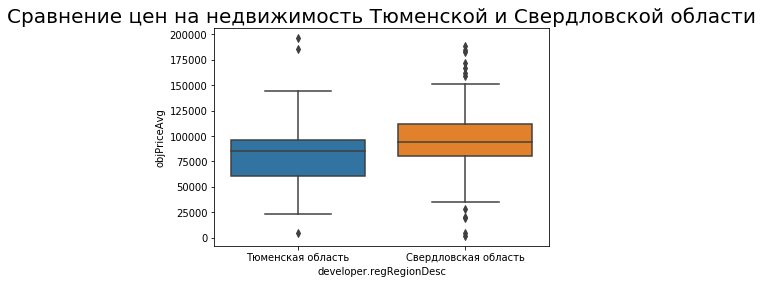

In [50]:
v.make_boxplot()

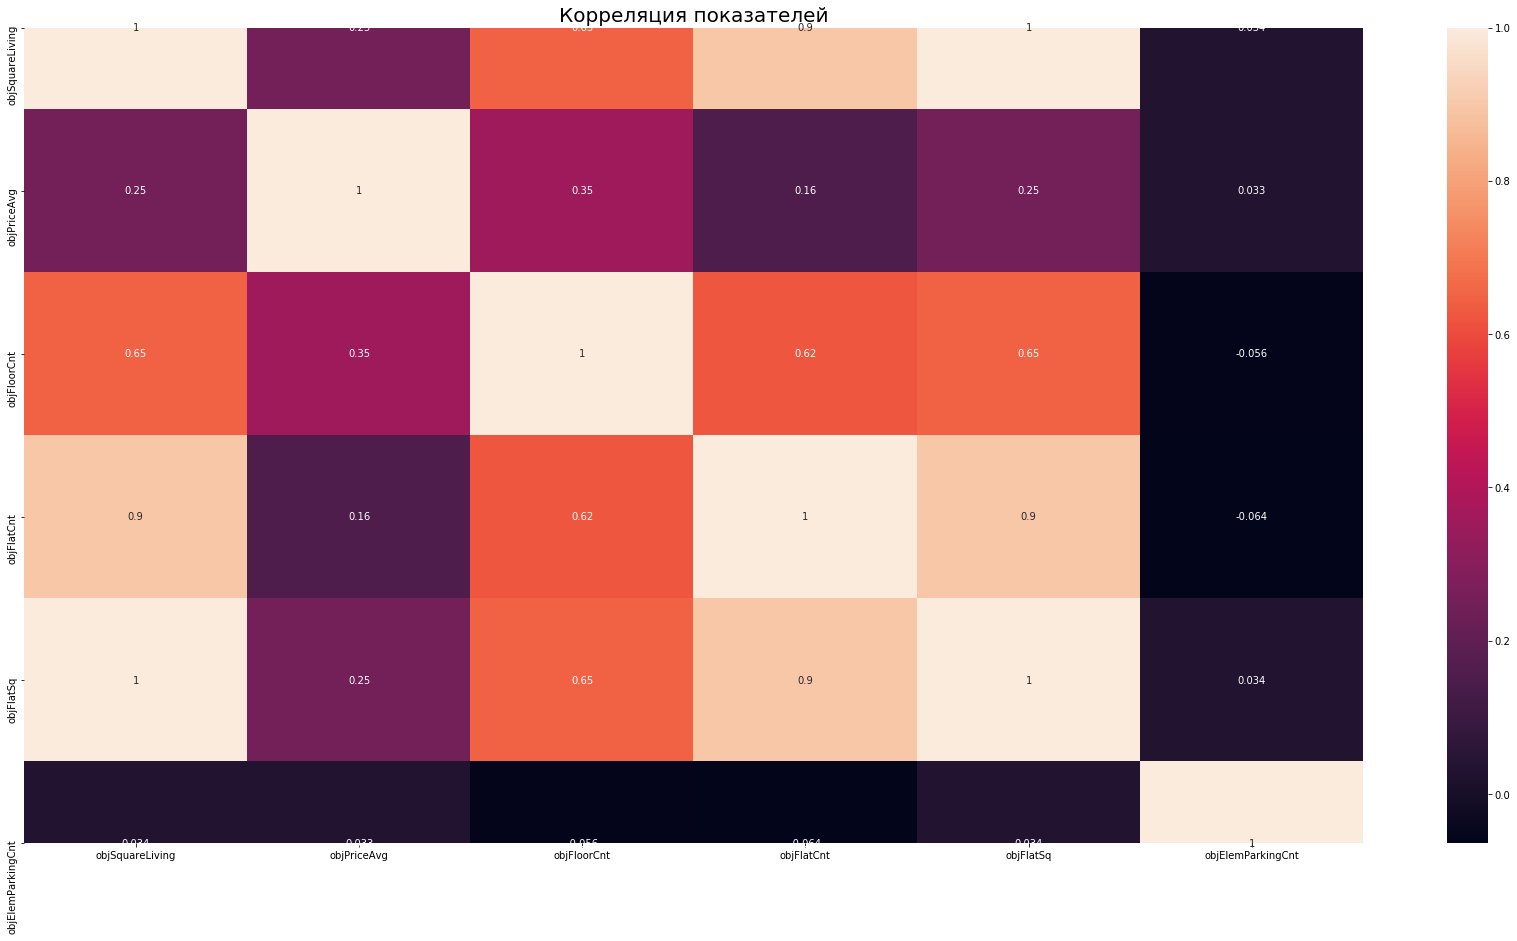

In [51]:
v1.make_heatmap()